In [3]:
import pandas as pd 
import numpy as np 

In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/avnyadav/sensor-fault-detection/main/aps_failure_training_set1.csv', na_values='na')

In [5]:

df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [6]:
%pip install xgboost
%pip install catboost


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [7]:

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer, KNNImputer

from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.compose import ColumnTransformer

from catboost import CatBoostClassifier

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

import pandas as pd

import seaborn as sns

import numpy as np

from statistics import mean

import matplotlib.pyplot as plt


from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier



In [8]:
#define numeric and categorical columns
numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

print("We have {} numeric columns: {}".format(len(numeric_columns), numeric_columns))
print("We have {} categorical columns: {}".format(len(categorical_columns), categorical_columns))


We have 170 numeric columns: ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'c

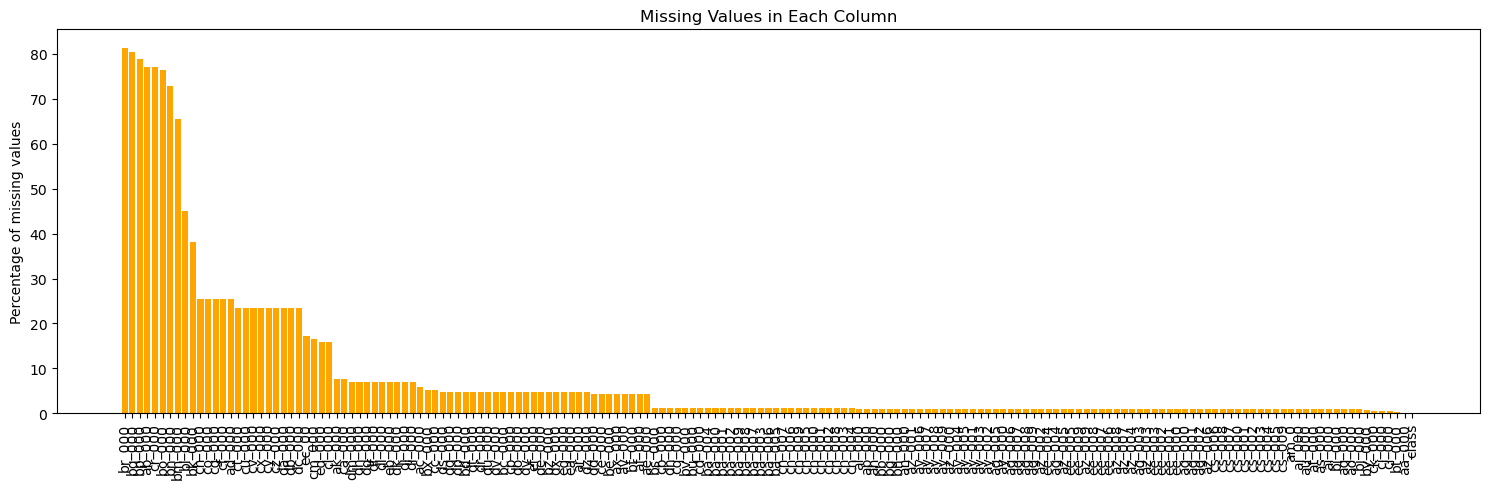

In [9]:
# Check and visualize missing values in each column

# Calculate missing value percentage
missing_values = df.isna().sum().div(df.shape[0]).mul(100).to_frame(name='missing_percent')

# Sort in descending order
missing_values = missing_values.sort_values(by='missing_percent', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(missing_values.index, missing_values['missing_percent'], color='orange')
plt.xticks(rotation=90)
plt.ylabel('Percentage of missing values')
plt.title('Missing Values in Each Column')
plt.tight_layout()
plt.show()


Exclude col with 70% + null values

In [10]:
dropcols = missing_values[missing_values['missing_percent'] > 70]
# Drop columns with more than 70% missing values
dropcols

,missing_percent
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [11]:
df.drop(columns=dropcols.index, inplace=True)
df.shape

(36188, 164)

In [12]:
missing_values_count = df.isna().sum()
total_cells = np.prod(df.shape)
total_missing = missing_values_count.sum()
print(f"Total missing values: {total_missing} out of {total_cells} cells ({(total_missing / total_cells) * 100:.2f}%)")

Total missing values: 318736 out of 5934832 cells (5.37%)


Visualize the target value

positive: 1000 , Negative: 35188


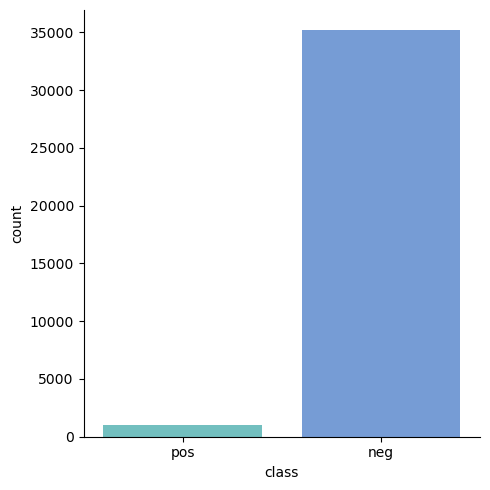

In [13]:
positive_count = df['class'].value_counts().get('pos', 0)
negative_count = df['class'].value_counts().get('neg', 0)
print("positive: " + str(positive_count), ", Negative: " + str(negative_count))
sns.catplot(data=df, x='class', kind='count', palette="winter_r", alpha = 0.6)
plt.show()

In [14]:
def evaluate_clf(true, predicted):
    """
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    """

    acc = accuracy_score(true, predicted) # Calculate Accuracy
    
    f1 = f1_score(true, predicted) # Calculate F I-score
    
    precision = precision_score(true, predicted) # Calculate Precision
   
    recall = recall_score(true, predicted) # Calculate Recall
   
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    
    return acc, f1, precision, recall, roc_auc


In [15]:
def total_cost(y_true, y_pred):
    '''function accepts y_true and y_pred and returns the total cost of misclassification'''
    tp, tn, fp, fn = confusion_matrix(y_true, y_pred).ravel()
    cost = fp*10 + fn*500
    return cost

In [16]:
def evaluate_models(X, y, models):
    """
    This function takes in x, y and a list of models
    Returns: A dataframe with model name, accuracy, f1-score, precision, recall, roc-auc score and total cost
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    cost_list = []
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)  # trian the model
        
        # make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # training set performance
        model_train_accuracy, model_train_f1, model_train_precision, model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)
        
        # Test set performance
        model_test_accuracy, model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)
        
        print(f"Model: {list(models.keys())[i]}")
        models_list.append(list(models.keys())[i])
        
        
        print( 'Model performance for Training set')
        print("- Accuracy: {: .4f}". format(model_train_accuracy))
        print("- F1-Score: {: .4f}". format(model_train_f1))
        print("- Precision: {: .4f}". format(model_train_precision))
        print("- Recall: {: .4f}". format(model_train_recall))
        print("- Roc-auc Score: {: .4f}". format(model_train_rocauc_score))
        print("- Total Cost: {: .2f}". format(train_cost))
        
        print("--------------------------------------------------------------")
        
        print( 'Model performance for Test set')
        print("- Accuracy: {: .4f}". format(model_test_accuracy))
        print("- F1-Score: {: .4f}". format(model_test_f1))
        print("- Precision: {: .4f}". format(model_test_precision))
        print("- Recall: {: .4f}". format(model_test_recall))
        print("- Roc-auc Score: {: .4f}". format(model_test_rocauc_score))
        print("- Total Cost: {: .2f}". format(test_cost))
        
        
        
        report = pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Total Cost']).sort_values(by='Total Cost', ascending=True)
        return report
    #     cost_list.append(test_cost)
    #     accuracy_list.append(model_test_accuracy)
    
    # # Create a dataframe with the results
    # results = pd.DataFrame({
    #     'Model': models_list,
    #     'Accuracy': accuracy_list,
    #     'Total Cost': cost_list
    # })
    
    # return results
        

In [17]:
# numeric_features = [feature for feature in df.columns if df[feature].dtype != '0']
# plt.figure(figsize=(15, 100))
# for i, col in enumerate(numeric_features):
#     plt.subplot(60, 3, i+1)
#     sns.histplot(x=df[col], color='orange')
#     plt.title(col)
#     plt.xlabel(col, weight='bold')
#     plt.tight_layout()

In [18]:
X = df.drop('class', axis=1)
y = df['class']

In [19]:
y = y.replace({'pos': 1, 'neg': 0})  # Convert target variable to binary

In [20]:
results = []
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m',LogisticRegression())])
    
    
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=2, n_jobs=-1)
    
    results.append(scores)
    print(f"n_neighbours = {s} - Accuracy: {mean(scores):.4f} ± {np.std(scores):.4f}")

n_neighbours = 1 - Accuracy: 0.9839 ± 0.0001
n_neighbours = 3 - Accuracy: 0.9839 ± 0.0001
n_neighbours = 5 - Accuracy: 0.9843 ± 0.0001
n_neighbours = 7 - Accuracy: 0.9844 ± 0.0002
n_neighbours = 9 - Accuracy: 0.9845 ± 0.0003
